In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tqdm
import gensim
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer 
from nltk.stem import WordNetLemmatizer 
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from gensim.models import CoherenceModel
import pyLDAvis.gensim
import pickle 
import pyLDAvis



# EDA

In [2]:
df = pd.read_csv('maindata.csv')

In [3]:
df.info

<bound method DataFrame.info of        Unnamed: 0  artist_name                              title  \
0               0       Halsey                         Without Me   
1               1       Halsey                             Colors   
2               2       Halsey                        Bad at Love   
3               3       Halsey                          Nightmare   
4               4       Halsey                              Sorry   
...           ...          ...                                ...   
30986         292  Nicki Minaj                     My Heart 2 You   
30987         293  Nicki Minaj  Pound the Alarm (Kitz Looper mix)   
30988         294  Nicki Minaj                             Mashup   
30989         295  Nicki Minaj                       Money Hungry   
30990         296  Nicki Minaj                             Go Off   

                                 album  \
0             Manic (Target Exclusive)   
1            BADLANDS (Deluxe Edition)   
2            

In [4]:
df.dtypes
df.drop('Unnamed: 0', axis = 1, inplace = True)

In [5]:
df.isna().sum()

artist_name        0
title              0
album              0
lyrics           251
date           13381
url                0
dtype: int64

In [6]:
df['lyrics'] = df['lyrics'].fillna(value='')

In [7]:
def remove_punct(s):
    new_lyr = re.sub(r'[^\w\s]', '', s).lower()
    new_lyr = re.sub(r'[\n]', ' ', new_lyr).lower()
    return new_lyr

df.lyrics = df.lyrics.apply(remove_punct)

In [8]:
df["lyrics_len"] = [len(x) for x in df["lyrics"]]

In [9]:
nltk.download('stopwords')
stop_words = stopwords.words('english')


[nltk_data] Downloading package stopwords to /home/rute/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [10]:
df['without_stopwords'] = df.apply(lambda x : ' '.join([w for w in x['lyrics'].split(' ') if w not in stop_words]), axis = 1)

In [11]:
new_df = df[df.lyrics_len != 0]
new_df = new_df[new_df.lyrics != "Instrumental"]
new_df

,artist_name,title,album,lyrics,date,url,lyrics_len,without_stopwords
0,Halsey,Without Me,Manic (Target Exclusive),found you when your heart was broke i filled y...,2018-10-04,https://genius.com/Halsey-without-me-lyrics,1988,found heart broke filled cup overflowed took f...
1,Halsey,Colors,BADLANDS (Deluxe Edition),your little brother never tells you but he lov...,2015-08-28,https://genius.com/Halsey-colors-lyrics,1816,little brother never tells loves said mother s...
2,Halsey,Bad at Love,hopeless fountain kingdom,got a boy back home in michigan and he tastes ...,2017-06-02,https://genius.com/Halsey-bad-at-love-lyrics,2009,got boy back home michigan tastes like jack im...
3,Halsey,Nightmare,"triple j’s Hottest 100, Vol. 27",now i lay me down to sleep i pray the lord my ...,2019-05-17,https://genius.com/Halsey-nightmare-lyrics,2407,lay sleep pray lord soul keep shall die wake p...
4,Halsey,Sorry,hopeless fountain kingdom,ive missed your calls for months it seems dont...,2017-06-02,https://genius.com/Halsey-sorry-lyrics,1577,ive missed calls months seems dont realize mea...
...,...,...,...,...,...,...,...,...
30986,Nicki Minaj,My Heart 2 You,---,hook hey where are you going why are you leavi...,NaN,https://genius.com/Nicki-minaj-my-heart-2-you-...,476,hook hey going leaving said would till end ver...
30987,Nicki Minaj,Pound the Alarm (Kitz Looper mix),---,oh oh oh come fill my glass up a little more w...,NaN,https://genius.com/Nicki-minaj-pound-the-alarm...,1456,oh oh oh come fill glass little bout get burn ...
30988,Nicki Minaj,Mashup,---,bingiling gyal with okra body to the front of ...,NaN,https://genius.com/Nicki-minaj-mashup-lyrics,54,bingiling gyal okra body front line
30989,Nicki Minaj,Money Hungry,---,lyrics not confirmed,2016-07-01,https://genius.com/Nicki-minaj-money-hungry-ly...,20,lyrics confirmed


In [12]:
q_low = new_df['lyrics_len'].quantile(0.02)
q_hi  = new_df['lyrics_len'].quantile(0.99)

df_filtered = new_df[(new_df['lyrics_len'] < q_hi) & (new_df['lyrics_len'] > q_low)]
df_filtered#.to_csv('df_filtered.csv')

,artist_name,title,album,lyrics,date,url,lyrics_len,without_stopwords
0,Halsey,Without Me,Manic (Target Exclusive),found you when your heart was broke i filled y...,2018-10-04,https://genius.com/Halsey-without-me-lyrics,1988,found heart broke filled cup overflowed took f...
1,Halsey,Colors,BADLANDS (Deluxe Edition),your little brother never tells you but he lov...,2015-08-28,https://genius.com/Halsey-colors-lyrics,1816,little brother never tells loves said mother s...
2,Halsey,Bad at Love,hopeless fountain kingdom,got a boy back home in michigan and he tastes ...,2017-06-02,https://genius.com/Halsey-bad-at-love-lyrics,2009,got boy back home michigan tastes like jack im...
3,Halsey,Nightmare,"triple j’s Hottest 100, Vol. 27",now i lay me down to sleep i pray the lord my ...,2019-05-17,https://genius.com/Halsey-nightmare-lyrics,2407,lay sleep pray lord soul keep shall die wake p...
4,Halsey,Sorry,hopeless fountain kingdom,ive missed your calls for months it seems dont...,2017-06-02,https://genius.com/Halsey-sorry-lyrics,1577,ive missed calls months seems dont realize mea...
...,...,...,...,...,...,...,...,...
30983,Nicki Minaj,Roman’s Revenge Alternate Version (I FEEL PRETTY),---,i feel pretty x3 and witty and gay and i pity ...,2010-09-06,https://genius.com/Nicki-minaj-romans-revenge-...,2841,feel pretty x3 witty gay pity girl isnt tonigh...
30984,Nicki Minaj,Pound the Alarm (Liam Keegan mix),---,oh oh oh come fill my glass up a little more w...,NaN,https://genius.com/Nicki-minaj-pound-the-alarm...,1456,oh oh oh come fill glass little bout get burn ...
30985,Nicki Minaj,Mi Casa,---,i got dhat hard gucc u know dese bitches eazy ...,NaN,https://genius.com/Nicki-minaj-mi-casa-lyrics,540,got dhat hard gucc u know dese bitches eazy go...
30986,Nicki Minaj,My Heart 2 You,---,hook hey where are you going why are you leavi...,NaN,https://genius.com/Nicki-minaj-my-heart-2-you-...,476,hook hey going leaving said would till end ver...


In [13]:
#describing lyrics len by artist

artist_word_len = pd.DataFrame()

artist_word_len["words_avg"] = df_filtered.groupby(["artist_name"])["lyrics_len"].mean()
artist_word_len["words_min"] = df_filtered.groupby(["artist_name"])["lyrics_len"].min()
artist_word_len["words_max"] = df_filtered.groupby(["artist_name"])["lyrics_len"].max()

In [14]:
artist_word_len.sort_values(by="words_max")

,words_avg,words_min,words_max
artist_name,,,
Kadhja Bonet,744.125000,239,1199
Lisa Gerrard,673.230769,296,1228
Billie Marten,848.129032,476,1234
Anna Calvi,667.018868,211,1376
Nadine Shah,690.775000,210,1405
...,...,...,...
Jennifer Lopez,1990.695431,142,3433
Mariah Carey,1687.771084,160,3435
Janelle Monáe,1539.425287,194,3436


In [15]:
artist_word_len.to_csv("artist_len.csv")

(array([ 410.,  733., 1389., 1936., 2464., 2611., 2663., 2494., 2449.,
        2241., 1857., 1608., 1262., 1120.,  927.,  727.,  578.,  434.,
         376.,  276.,  245.,  165.,  138.,   74.,   83.]),
 array([ 138.  ,  270.24,  402.48,  534.72,  666.96,  799.2 ,  931.44,
        1063.68, 1195.92, 1328.16, 1460.4 , 1592.64, 1724.88, 1857.12,
        1989.36, 2121.6 , 2253.84, 2386.08, 2518.32, 2650.56, 2782.8 ,
        2915.04, 3047.28, 3179.52, 3311.76, 3444.  ]),
 <a list of 25 Patch objects>)

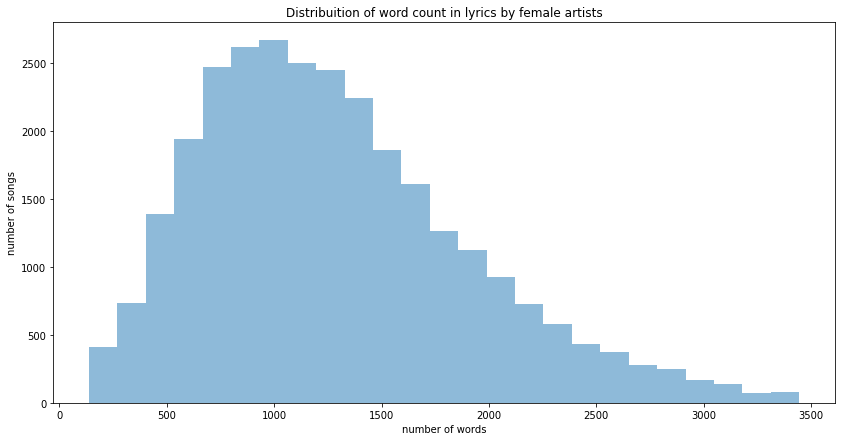

In [16]:
fig, ax = plt.subplots(figsize = (14, 7))

#plt.hist(artist_word_len["words_avg"], alpha = 0.5)
#plt.hist(artist_word_len["words_min"], alpha = 0.5)
#plt.hist(artist_word_len["words_max"], alpha = 0.5)
plt.title("Distribuition of word count in lyrics by female artists")
plt.xlabel("number of words")
plt.ylabel("number of songs")
plt.hist(df_filtered['lyrics_len'], bins = 25, alpha=0.5)

# NLP

In [17]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /home/rute/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [18]:
tokens = nltk.word_tokenize(df_filtered['without_stopwords'][2])
print ('From: ', df_filtered['without_stopwords'][2])
print('\nTo: ', tokens) #tokens is a beauuuuutiful list

df_filtered['tokens'] = df_filtered['without_stopwords'].apply(nltk.word_tokenize) # THIS IS THE MOST EFFICIENT

From:  got boy back home michigan tastes like jack im kissing told never really liked friends hes gone hes calling bitch theres guy lives garden state told wed make til graduate told music would worth wait wants kitchen dinner plate  believe believe believe believe meant jealousy jealousy jealousy jealousy get best look dont mean frustrate always make mistakes yeah always make mistakes cause  im bad love oohooh cant blame tryin know id lyin sayin one oohooh could finally fix lookin history im bad love  got girl california eyes thought could really one time never got chance make mine fell love little thin white lines london girl attitude never told one look cute got way better things always think im riding  believe believe believe believe im deep jealousy jealousy jealousy jealousy get best look dont mean frustrate always make mistakes yeah always make mistakes cause  im bad love oohooh cant blame tryin know id lyin sayin one oohooh could finally fix lookin history im bad love  oh know 

/home/rute/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [19]:
df_filtered

,artist_name,title,album,lyrics,date,url,lyrics_len,without_stopwords,tokens
0,Halsey,Without Me,Manic (Target Exclusive),found you when your heart was broke i filled y...,2018-10-04,https://genius.com/Halsey-without-me-lyrics,1988,found heart broke filled cup overflowed took f...,"[found, heart, broke, filled, cup, overflowed,..."
1,Halsey,Colors,BADLANDS (Deluxe Edition),your little brother never tells you but he lov...,2015-08-28,https://genius.com/Halsey-colors-lyrics,1816,little brother never tells loves said mother s...,"[little, brother, never, tells, loves, said, m..."
2,Halsey,Bad at Love,hopeless fountain kingdom,got a boy back home in michigan and he tastes ...,2017-06-02,https://genius.com/Halsey-bad-at-love-lyrics,2009,got boy back home michigan tastes like jack im...,"[got, boy, back, home, michigan, tastes, like,..."
3,Halsey,Nightmare,"triple j’s Hottest 100, Vol. 27",now i lay me down to sleep i pray the lord my ...,2019-05-17,https://genius.com/Halsey-nightmare-lyrics,2407,lay sleep pray lord soul keep shall die wake p...,"[lay, sleep, pray, lord, soul, keep, shall, di..."
4,Halsey,Sorry,hopeless fountain kingdom,ive missed your calls for months it seems dont...,2017-06-02,https://genius.com/Halsey-sorry-lyrics,1577,ive missed calls months seems dont realize mea...,"[ive, missed, calls, months, seems, dont, real..."
...,...,...,...,...,...,...,...,...,...
30983,Nicki Minaj,Roman’s Revenge Alternate Version (I FEEL PRETTY),---,i feel pretty x3 and witty and gay and i pity ...,2010-09-06,https://genius.com/Nicki-minaj-romans-revenge-...,2841,feel pretty x3 witty gay pity girl isnt tonigh...,"[feel, pretty, x3, witty, gay, pity, girl, isn..."
30984,Nicki Minaj,Pound the Alarm (Liam Keegan mix),---,oh oh oh come fill my glass up a little more w...,NaN,https://genius.com/Nicki-minaj-pound-the-alarm...,1456,oh oh oh come fill glass little bout get burn ...,"[oh, oh, oh, come, fill, glass, little, bout, ..."
30985,Nicki Minaj,Mi Casa,---,i got dhat hard gucc u know dese bitches eazy ...,NaN,https://genius.com/Nicki-minaj-mi-casa-lyrics,540,got dhat hard gucc u know dese bitches eazy go...,"[got, dhat, hard, gucc, u, know, dese, bitches..."
30986,Nicki Minaj,My Heart 2 You,---,hook hey where are you going why are you leavi...,NaN,https://genius.com/Nicki-minaj-my-heart-2-you-...,476,hook hey going leaving said would till end ver...,"[hook, hey, going, leaving, said, would, till,..."


## Stemming

In [20]:
ps = PorterStemmer ()
#print([ps.stem(w) for w in tokens])

## Apply per review
df_filtered['stemmed'] = df_filtered.apply(lambda x : [ps.stem(l) for l in x['tokens']], axis = 1)

/home/rute/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [21]:
df_filtered

,artist_name,title,album,lyrics,date,url,lyrics_len,without_stopwords,tokens,stemmed
0,Halsey,Without Me,Manic (Target Exclusive),found you when your heart was broke i filled y...,2018-10-04,https://genius.com/Halsey-without-me-lyrics,1988,found heart broke filled cup overflowed took f...,"[found, heart, broke, filled, cup, overflowed,...","[found, heart, broke, fill, cup, overflow, too..."
1,Halsey,Colors,BADLANDS (Deluxe Edition),your little brother never tells you but he lov...,2015-08-28,https://genius.com/Halsey-colors-lyrics,1816,little brother never tells loves said mother s...,"[little, brother, never, tells, loves, said, m...","[littl, brother, never, tell, love, said, moth..."
2,Halsey,Bad at Love,hopeless fountain kingdom,got a boy back home in michigan and he tastes ...,2017-06-02,https://genius.com/Halsey-bad-at-love-lyrics,2009,got boy back home michigan tastes like jack im...,"[got, boy, back, home, michigan, tastes, like,...","[got, boy, back, home, michigan, tast, like, j..."
3,Halsey,Nightmare,"triple j’s Hottest 100, Vol. 27",now i lay me down to sleep i pray the lord my ...,2019-05-17,https://genius.com/Halsey-nightmare-lyrics,2407,lay sleep pray lord soul keep shall die wake p...,"[lay, sleep, pray, lord, soul, keep, shall, di...","[lay, sleep, pray, lord, soul, keep, shall, di..."
4,Halsey,Sorry,hopeless fountain kingdom,ive missed your calls for months it seems dont...,2017-06-02,https://genius.com/Halsey-sorry-lyrics,1577,ive missed calls months seems dont realize mea...,"[ive, missed, calls, months, seems, dont, real...","[ive, miss, call, month, seem, dont, realiz, m..."
...,...,...,...,...,...,...,...,...,...,...
30983,Nicki Minaj,Roman’s Revenge Alternate Version (I FEEL PRETTY),---,i feel pretty x3 and witty and gay and i pity ...,2010-09-06,https://genius.com/Nicki-minaj-romans-revenge-...,2841,feel pretty x3 witty gay pity girl isnt tonigh...,"[feel, pretty, x3, witty, gay, pity, girl, isn...","[feel, pretti, x3, witti, gay, piti, girl, isn..."
30984,Nicki Minaj,Pound the Alarm (Liam Keegan mix),---,oh oh oh come fill my glass up a little more w...,NaN,https://genius.com/Nicki-minaj-pound-the-alarm...,1456,oh oh oh come fill glass little bout get burn ...,"[oh, oh, oh, come, fill, glass, little, bout, ...","[oh, oh, oh, come, fill, glass, littl, bout, g..."
30985,Nicki Minaj,Mi Casa,---,i got dhat hard gucc u know dese bitches eazy ...,NaN,https://genius.com/Nicki-minaj-mi-casa-lyrics,540,got dhat hard gucc u know dese bitches eazy go...,"[got, dhat, hard, gucc, u, know, dese, bitches...","[got, dhat, hard, gucc, u, know, dese, bitch, ..."
30986,Nicki Minaj,My Heart 2 You,---,hook hey where are you going why are you leavi...,NaN,https://genius.com/Nicki-minaj-my-heart-2-you-...,476,hook hey going leaving said would till end ver...,"[hook, hey, going, leaving, said, would, till,...","[hook, hey, go, leav, said, would, till, end, ..."


## Lemmatization

In [22]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /home/rute/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [23]:
lemmatizer = WordNetLemmatizer()
#print([lemmatizer.lemmatize(ps.stem(w)) for w in tokens])   ## defalut variable with no documentation

## Apply per review
df_filtered['lemms'] = df_filtered.apply(lambda x : [lemmatizer.lemmatize(w) for w in x['stemmed']], axis = 1)

/home/rute/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [24]:
df_filtered

,artist_name,title,album,lyrics,date,url,lyrics_len,without_stopwords,tokens,stemmed,lemms
0,Halsey,Without Me,Manic (Target Exclusive),found you when your heart was broke i filled y...,2018-10-04,https://genius.com/Halsey-without-me-lyrics,1988,found heart broke filled cup overflowed took f...,"[found, heart, broke, filled, cup, overflowed,...","[found, heart, broke, fill, cup, overflow, too...","[found, heart, broke, fill, cup, overflow, too..."
1,Halsey,Colors,BADLANDS (Deluxe Edition),your little brother never tells you but he lov...,2015-08-28,https://genius.com/Halsey-colors-lyrics,1816,little brother never tells loves said mother s...,"[little, brother, never, tells, loves, said, m...","[littl, brother, never, tell, love, said, moth...","[littl, brother, never, tell, love, said, moth..."
2,Halsey,Bad at Love,hopeless fountain kingdom,got a boy back home in michigan and he tastes ...,2017-06-02,https://genius.com/Halsey-bad-at-love-lyrics,2009,got boy back home michigan tastes like jack im...,"[got, boy, back, home, michigan, tastes, like,...","[got, boy, back, home, michigan, tast, like, j...","[got, boy, back, home, michigan, tast, like, j..."
3,Halsey,Nightmare,"triple j’s Hottest 100, Vol. 27",now i lay me down to sleep i pray the lord my ...,2019-05-17,https://genius.com/Halsey-nightmare-lyrics,2407,lay sleep pray lord soul keep shall die wake p...,"[lay, sleep, pray, lord, soul, keep, shall, di...","[lay, sleep, pray, lord, soul, keep, shall, di...","[lay, sleep, pray, lord, soul, keep, shall, di..."
4,Halsey,Sorry,hopeless fountain kingdom,ive missed your calls for months it seems dont...,2017-06-02,https://genius.com/Halsey-sorry-lyrics,1577,ive missed calls months seems dont realize mea...,"[ive, missed, calls, months, seems, dont, real...","[ive, miss, call, month, seem, dont, realiz, m...","[ive, miss, call, month, seem, dont, realiz, m..."
...,...,...,...,...,...,...,...,...,...,...,...
30983,Nicki Minaj,Roman’s Revenge Alternate Version (I FEEL PRETTY),---,i feel pretty x3 and witty and gay and i pity ...,2010-09-06,https://genius.com/Nicki-minaj-romans-revenge-...,2841,feel pretty x3 witty gay pity girl isnt tonigh...,"[feel, pretty, x3, witty, gay, pity, girl, isn...","[feel, pretti, x3, witti, gay, piti, girl, isn...","[feel, pretti, x3, witti, gay, piti, girl, isn..."
30984,Nicki Minaj,Pound the Alarm (Liam Keegan mix),---,oh oh oh come fill my glass up a little more w...,NaN,https://genius.com/Nicki-minaj-pound-the-alarm...,1456,oh oh oh come fill glass little bout get burn ...,"[oh, oh, oh, come, fill, glass, little, bout, ...","[oh, oh, oh, come, fill, glass, littl, bout, g...","[oh, oh, oh, come, fill, glass, littl, bout, g..."
30985,Nicki Minaj,Mi Casa,---,i got dhat hard gucc u know dese bitches eazy ...,NaN,https://genius.com/Nicki-minaj-mi-casa-lyrics,540,got dhat hard gucc u know dese bitches eazy go...,"[got, dhat, hard, gucc, u, know, dese, bitches...","[got, dhat, hard, gucc, u, know, dese, bitch, ...","[got, dhat, hard, gucc, u, know, dese, bitch, ..."
30986,Nicki Minaj,My Heart 2 You,---,hook hey where are you going why are you leavi...,NaN,https://genius.com/Nicki-minaj-my-heart-2-you-...,476,hook hey going leaving said would till end ver...,"[hook, hey, going, leaving, said, would, till,...","[hook, hey, go, leav, said, would, till, end, ...","[hook, hey, go, leav, said, would, till, end, ..."


In [25]:
y = df_filtered['lemms']
X = df_filtered.drop(['lemms'], axis = 1)

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

## Bag of Words

In [27]:
processed_docs = y_train

id2word = gensim.corpora.Dictionary(processed_docs)

In [28]:
processed_docs

27930    [oh, drive, crazi, cant, stop, way, feel, thin...
13402    [see, futur, without, hell, past, ive, learn, ...
13836    [cling, like, last, breath, would, breath, lik...
23497    [aint, scene, vip, aint, scene, aint, scene, h...
9242     [see, walk, ddown, street, start, cri, time, m...
                               ...                        
1376     [allow, pick, left, biggest, phenomenon, im, p...
26674    [bell, ring, glad, glad, news, oh, christma, b...
8686     [sometim, think, he, undress, eye, visual, car...
12544    [fall, love, forev, ill, never, fall, love, re...
3511     [amor, estoy, solo, agui, en, la, playa, e, el...
Name: lemms, Length: 23408, dtype: object

In [29]:
id2word.filter_extremes(no_below=15, no_above=0.1, keep_n= 100000)

In [30]:
corpus = [id2word.doc2bow(doc) for doc in processed_docs]

In [31]:
#printing for testing/checking

document_num = 20
bow_doc_x = corpus[document_num]

for i in range(len(bow_doc_x)):
    print("Word {} (\"{}\") appears {} time.".format(bow_doc_x[i][0], 
                                                     id2word[bow_doc_x[i][0]], 
                                                     bow_doc_x[i][1]))

Word 14 ("rest") appears 1 time.
Word 28 ("em") appears 4 time.
Word 37 ("money") appears 2 time.
Word 88 ("coupl") appears 2 time.
Word 90 ("dirti") appears 2 time.
Word 97 ("fuck") appears 6 time.
Word 110 ("shit") appears 3 time.
Word 111 ("sick") appears 3 time.
Word 130 ("left") appears 1 time.
Word 159 ("power") appears 1 time.
Word 163 ("somethin") appears 1 time.
Word 189 ("deep") appears 1 time.
Word 230 ("watch") appears 1 time.
Word 236 ("2") appears 1 time.
Word 312 ("move") appears 1 time.
Word 339 ("spend") appears 2 time.
Word 357 ("fun") appears 1 time.
Word 380 ("mean") appears 1 time.
Word 382 ("phone") appears 1 time.
Word 387 ("side") appears 1 time.
Word 389 ("told") appears 1 time.
Word 436 ("rememb") appears 2 time.
Word 441 ("wonder") appears 1 time.
Word 448 ("oooh") appears 1 time.
Word 487 ("30") appears 1 time.
Word 488 ("50") appears 1 time.
Word 489 ("b") appears 3 time.
Word 490 ("bag") appears 2 time.
Word 491 ("beef") appears 1 time.
Word 492 ("bitch") 

In [ ]:
lda_model =  gensim.models.LdaMulticore(corpus, 
                                   num_topics = 8, 
                                   id2word = id2word,                                    
                                   passes = 10, alpha = 0.03,
                                   workers = 2)

In [33]:
'''
For each topic, these are the words occuring in that topic and their relative weight
'''
for idx, topic in lda_model.print_topics(-1):
    print("Topic: {} \nWords: {}".format(idx, topic ))
    print("\n")

Topic: 0 
Words: 0.029*"sweet" + 0.022*"free" + 0.021*"alright" + 0.019*"round" + 0.019*"care" + 0.014*"babe" + 0.014*"mine" + 0.011*"lovin" + 0.009*"bit" + 0.009*"new"


Topic: 1 
Words: 0.024*"ya" + 0.021*"bitch" + 0.017*"fuck" + 0.017*"ah" + 0.015*"em" + 0.015*"shit" + 0.011*"nigga" + 0.010*"money" + 0.007*"yo" + 0.007*"big"


Topic: 2 
Words: 0.035*"tonight" + 0.034*"da" + 0.028*"christma" + 0.027*"work" + 0.023*"bad" + 0.022*"bring" + 0.015*"shake" + 0.014*"ride" + 0.013*"readi" + 0.011*"new"


Topic: 3 
Words: 0.045*"que" + 0.044*"de" + 0.034*"la" + 0.024*"le" + 0.022*"tu" + 0.021*"mi" + 0.020*"te" + 0.017*"en" + 0.017*"el" + 0.016*"lo"


Topic: 4 
Words: 0.014*"burn" + 0.011*"fire" + 0.010*"hurt" + 0.010*"tear" + 0.010*"blue" + 0.009*"happi" + 0.009*"heaven" + 0.008*"goodby" + 0.008*"she" + 0.007*"roll"


Topic: 5 
Words: 0.023*"miss" + 0.018*"touch" + 0.018*"ye" + 0.016*"break" + 0.015*"high" + 0.015*"fli" + 0.013*"breath" + 0.010*"lone" + 0.010*"lose" + 0.010*"til"


Topic: 6 

## Tweaking and testing

In [34]:
from gensim.models import CoherenceModel

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=df_filtered['lemms'], dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()

print('\nCoherence Score: ', coherence_lda)


Coherence Score:  0.4585960783748068


In [35]:
# Visualize the topics
pyLDAvis.enable_notebook()

LDAvis_train = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)

LDAvis_train

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
6      0.101684 -0.101532       1        1  15.911818
8      0.089060 -0.017133       2        1  15.841195
1     -0.021465  0.221538       3        1  11.686473
4      0.094164 -0.065217       4        1  10.643595
9      0.071486 -0.134985       5        1  10.294797
7      0.017303  0.188443       6        1   9.956957
5      0.094894 -0.091468       7        1   8.179630
0      0.090570 -0.103695       8        1   7.086689
3     -0.525498 -0.094440       9        1   5.321432
2     -0.012199  0.198489      10        1   5.077412, topic_info=         Term          Freq         Total Category  logprob  loglift
406        la  10123.000000  10123.000000  Default  30.0000  30.0000
429       hey   8365.000000   8365.000000  Default  29.0000  29.0000
1201      que   3836.000000   3836.000000  Default  28.0000  28.0000
1155       de   3735.000000   3735.000000  Default  27.0000  27.0000
116   tonight   5599.000000   5599.000000  Default  26.0000  26.0000
...       ...           ...           ...      ...      ...      ...
553      year    549.684082   2485.201416  Topic10  -5.0006   1.4716
269       big    564.356750   2815.479980  Topic10  -4.9743   1.3732
362      town    437.048767   1405.519897  Topic10  -5.2299   1.8123
729      lord    428.818542   1881.154053  Topic10  -5.2489   1.5018
264    togeth    452.850739   3906.466553  Topic10  -5.1944   0.8255

[725 rows x 6 columns], token_table=      Topic      Freq     Term
term                          
138       2  0.032406        1
138       3  0.837150        1
138       6  0.030605        1
138       9  0.003601        1
138      10  0.095417        1
...     ...       ...      ...
172       7  0.003909    young
172       8  0.008253    young
172      10  0.013031    young
1525      3  0.995357      yuh
3371     10  0.986052  yuletid

[3080 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[7, 9, 2, 5, 10, 8, 6, 1, 4, 3])

In [36]:
pyLDAvis.save_html(LDAvis_train, 'lda.html')

In [37]:
'''unprocessed_docs = y_test
id2word_test = gensim.corpora.Dictionary(unprocessed_docs)
id2word_test.filter_extremes(no_below=15, no_above=0.1, keep_n= 100000)
corpus_test = [id2word.doc2bow(doc) for doc in unprocessed_docs]'''

In [38]:
#LDAvis_test = pyLDAvis.gensim.prepare(lda_model, corpus_test, id2word_test)

#LDAvis_test